In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
import pandas as pd

df = pd.read_csv('../data/train.csv', index_col=0)


In [3]:
df.Cabin.fillna('Z1',inplace=True)

In [4]:
df_Cabin_1=  df['Cabin'].str[0]
df_Cabin_2=  df['Cabin'].str[1:]

Cabin_new_1 = pd.DataFrame(df_Cabin_1)
Cabin_new_2 = pd.DataFrame(df_Cabin_2)

# Cabin_new_1.head()
# df_Cabin_1



In [5]:
Cabin_new_1['Cabin'] = Cabin_new_1['Cabin'].map({'A': 1,
                                   'B': 2,
                                   'C': 3,
                                   'D': 4,
                                   'E': 5,
                                   'F': 6,
                                   'G': 7,
                                   'T': 8,
                                   'Z': 9,

                   })
del df['Cabin']
df= df.join(Cabin_new_1)

In [6]:
del df['Ticket']

In [7]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=18)

In [9]:
df_train['Embarked'].fillna(method='bfill', inplace=True)


In [10]:
categorical_features = ['Embarked']
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
cols_1 = df_train[['Embarked']]
ohc.fit(cols_1)            # learn the classes
t_1 = ohc.transform(cols_1)  # result is a numpy array
embarked = pd.DataFrame(t_1, columns=ohc.get_feature_names_out(categorical_features))
df_train= df_train.join(embarked)
del df_train['Embarked']
del df_train['Embarked_C']

df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
465,0,3,"Maisner, Mr. Simon",0,NaN,0,0,8.0500,9,1.0,0.0
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,52.5542,4,NaN,NaN
507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",1,33.0,0,2,26.0000,9,1.0,0.0
148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",1,9.0,2,2,34.3750,9,0.0,1.0
489,0,3,"Somerton, Mr. Francis William",0,30.0,0,0,8.0500,9,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
703,0,3,"Barbara, Miss. Saiide",1,18.0,0,1,14.4542,9,1.0,0.0
838,0,3,"Sirota, Mr. Maurice",0,NaN,0,0,8.0500,9,NaN,NaN
121,0,2,"Hickman, Mr. Stanley George",0,21.0,2,0,73.5000,9,0.0,0.0


In [11]:
#df['Name']= len(df['Name'])
full_name_list=[]
for full_name_variable in df_train['Name']:
    full_name_list.append(len(full_name_variable))

full_name_length = pd.DataFrame(full_name_list, columns=['Name_length'])    
df_train= df_train.join(full_name_length)
del df_train['Name']

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Name_length
PassengerId,,,,,,,,,,,
465,0,3,0,NaN,0,0,8.0500,9,1.0,0.0,20.0
872,1,1,1,47.0,1,1,52.5542,4,NaN,NaN,NaN
507,1,2,1,33.0,0,2,26.0000,9,1.0,0.0,19.0
148,0,3,1,9.0,2,2,34.3750,9,0.0,1.0,33.0
489,0,3,0,30.0,0,0,8.0500,9,0.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
703,0,3,1,18.0,0,1,14.4542,9,1.0,0.0,18.0
838,0,3,0,NaN,0,0,8.0500,9,NaN,NaN,NaN
121,0,2,0,21.0,2,0,73.5000,9,0.0,0.0,26.0


In [12]:
df_train['Age'].fillna(value=df_train['Age'].mean(), inplace=True)

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Name_length
PassengerId,,,,,,,,,,,
465,0,3,0,29.995975,0,0,8.0500,9,1.0,0.0,20.0
872,1,1,1,47.000000,1,1,52.5542,4,NaN,NaN,NaN
507,1,2,1,33.000000,0,2,26.0000,9,1.0,0.0,19.0
148,0,3,1,9.000000,2,2,34.3750,9,0.0,1.0,33.0
489,0,3,0,30.000000,0,0,8.0500,9,0.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
703,0,3,1,18.000000,0,1,14.4542,9,1.0,0.0,18.0
838,0,3,0,29.995975,0,0,8.0500,9,NaN,NaN,NaN
121,0,2,0,21.000000,2,0,73.5000,9,0.0,0.0,26.0


In [13]:
kbins = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='kmeans')
columns_2 = df_train[['Age']]
kbins.fit(columns_2)
t_2 = kbins.transform(columns_2)
edges = kbins.bin_edges_[0].round(1)
labels = []
for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i]
    labels.append(f"up_to_{edge2}_years_old")
df_bins = pd.DataFrame(t_2, columns=labels)
df_train= df_train.join(df_bins)
del df_train['Age']

df_train


,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Name_length,up_to_0.4_years_old,up_to_24.1_years_old,up_to_42.0_years_old
PassengerId,,,,,,,,,,,,,
465,0,3,0,0,0,8.0500,9,1.0,0.0,20.0,0.0,0.0,1.0
872,1,1,1,1,1,52.5542,4,NaN,NaN,NaN,NaN,NaN,NaN
507,1,2,1,0,2,26.0000,9,1.0,0.0,19.0,0.0,1.0,0.0
148,0,3,1,2,2,34.3750,9,0.0,1.0,33.0,0.0,1.0,0.0
489,0,3,0,0,0,8.0500,9,0.0,1.0,25.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0,3,1,0,1,14.4542,9,1.0,0.0,18.0,0.0,1.0,0.0
838,0,3,0,0,0,8.0500,9,NaN,NaN,NaN,NaN,NaN,NaN
121,0,2,0,2,0,73.5000,9,0.0,0.0,26.0,0.0,0.0,1.0


In [14]:
scaler = MinMaxScaler()
cols_3 = df_train[['Fare']]
scaler.fit(cols_3)               # learn the min and max of the data
t_3 = scaler.transform(cols_3)     # apply the transformation to the data
cols_scaled = pd.DataFrame(t_3, columns=cols_3.columns)
df_train['Fare']=cols_scaled

df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Name_length,up_to_0.4_years_old,up_to_24.1_years_old,up_to_42.0_years_old
PassengerId,,,,,,,,,,,,,
465,0,3,0,0,0,0.015127,9,1.0,0.0,20.0,0.0,0.0,1.0
872,1,1,1,1,1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
507,1,2,1,0,2,0.047138,9,1.0,0.0,19.0,0.0,1.0,0.0
148,0,3,1,2,2,0.015713,9,0.0,1.0,33.0,0.0,1.0,0.0
489,0,3,0,0,0,0.051822,9,0.0,1.0,25.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0,3,1,0,1,0.015127,9,1.0,0.0,18.0,0.0,1.0,0.0
838,0,3,0,0,0,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
121,0,2,0,2,0,0.221098,9,0.0,0.0,26.0,0.0,0.0,1.0


In [15]:
df_train['Cabin'].fillna(method='bfill', inplace=True)

In [16]:
df_train.dropna(inplace=True)

In [17]:
df_test['Embarked'].fillna(method='bfill', inplace=True)


In [18]:
categorical_features = ['Embarked']
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
cols_1 = df_test[['Embarked']]
ohc.fit(cols_1)            # learn the classes
t_1 = ohc.transform(cols_1)  # result is a numpy array
embarked = pd.DataFrame(t_1, columns=ohc.get_feature_names(categorical_features))
df_test= df_test.join(embarked)
del df_test['Embarked']
del df_test['Embarked_C']

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
#df['Name']= len(df['Name'])
full_name_list=[]
for full_name_variable in df_test['Name']:
    full_name_list.append(len(full_name_variable))

full_name_length = pd.DataFrame(full_name_list, columns=['Name_length'])    
df_test= df_test.join(full_name_length)
del df_test['Name']


In [20]:
df_test['Age'].fillna(value=df_test['Age'].mean(), inplace=True)


In [21]:
kbins = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='kmeans')
columns_2 = df_test[['Age']]
kbins.fit(columns_2)
t_2 = kbins.transform(columns_2)
edges = kbins.bin_edges_[0].round(1)
labels = []
for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i]
    labels.append(f"up_to_{edge2}_years_old")
df_bins = pd.DataFrame(t_2, columns=labels)
df_test= df_test.join(df_bins)
del df_test['Age']


In [22]:
scaler = MinMaxScaler()
cols_3 = df_test[['Fare']]
scaler.fit(cols_3)               # learn the min and max of the data
t_3 = scaler.transform(cols_3)     # apply the transformation to the data
cols_scaled = pd.DataFrame(t_3, columns=cols_3.columns)
df_test['Fare']=cols_scaled

In [23]:
df_test['Cabin'].fillna(method='bfill', inplace=True)

In [24]:
df_test.dropna(inplace=True)

In [25]:
y_test_1= df_test['Survived']
X_test= df_test.iloc[:,1:]
y_test = pd.DataFrame(y_test_1, columns=['Survived'])

In [26]:
y_train_1= df_train['Survived']
X_train= df_train.iloc[:,1:]
y_train = pd.DataFrame(y_train_1, columns=['Survived'])

In [27]:
#X_train= (X_train-X_train.mean())/X_train.std()
#X_test = (X_test-X_test.mean())/X_test.std()


In [59]:
data_1 = X_train.join(y_train)

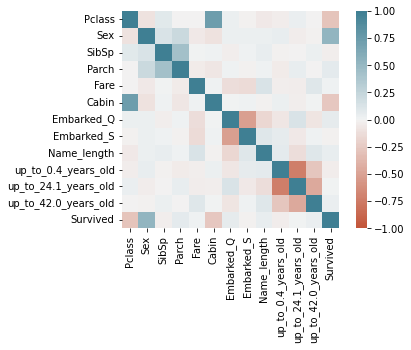

In [29]:
import seaborn as sns

corr = data_1.corr()
corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [61]:
#X_train.dropna(inplace=True)
#y_train.dropna(inplace=True)
X_train.describe
type(y_train_1)

pandas.core.series.Series

In [31]:
y_train_1.unique()

array([0, 1])

In [32]:
from sklearn.dummy import DummyClassifier

m = LogisticRegression()
m.fit(X_train, y_train)


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Name_length,up_to_0.4_years_old,up_to_24.1_years_old,up_to_42.0_years_old
PassengerId,,,,,,,,,,,,
465,3,0,0,0,0.015127,9,1.0,0.0,20.0,0.0,0.0,1.0
507,2,1,0,2,0.047138,9,1.0,0.0,19.0,0.0,1.0,0.0
148,3,1,2,2,0.015713,9,0.0,1.0,33.0,0.0,1.0,0.0
489,3,0,0,0,0.051822,9,0.0,1.0,25.0,0.0,0.0,1.0
142,3,1,0,0,0.020495,9,0.0,1.0,17.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,0,0,0,0.015127,1,1.0,0.0,25.0,0.0,1.0,0.0
703,3,1,0,1,0.015127,9,1.0,0.0,18.0,0.0,1.0,0.0
121,2,0,2,0,0.221098,9,0.0,0.0,26.0,0.0,0.0,1.0


In [34]:
m.score(X_test, y_test)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


0.8974358974358975

In [35]:
y_pred= m.predict(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


In [36]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


0.9230769230769231

In [37]:
y_pred_1= clf.predict(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn import metrics

In [40]:
metrics.recall_score(y_test, y_pred)

0.9

In [41]:
metrics.recall_score(y_test, y_pred_1)

0.9

In [42]:
metrics.accuracy_score(y_test, y_pred)

0.8974358974358975

In [43]:
metrics.accuracy_score(y_test, y_pred_1)

0.9230769230769231

In [44]:
metrics.f1_score( y_test, y_pred)

0.8181818181818182

In [45]:
metrics.f1_score( y_test, y_pred_1)

0.8571428571428572

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


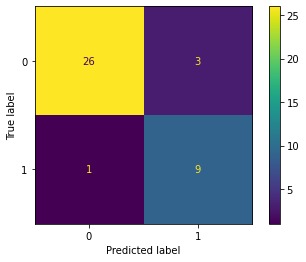

In [46]:
metrics.plot_confusion_matrix(m, X_test, y_test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


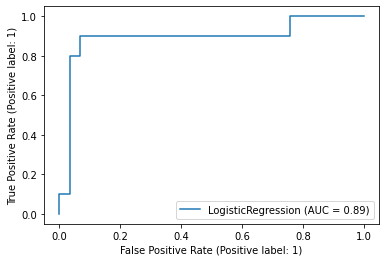

In [47]:
metrics.plot_roc_curve(m, X_test, y_test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


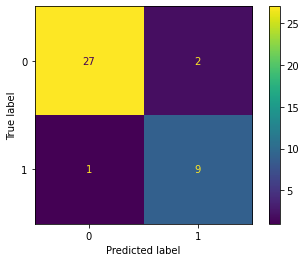

In [48]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- up_to_0.7_years_old
- up_to_20.1_years_old
- up_to_40.2_years_old
Feature names seen at fit time, yet now missing:
- up_to_0.4_years_old
- up_to_24.1_years_old
- up_to_42.0_years_old

  warnings.warn(message, FutureWarning)


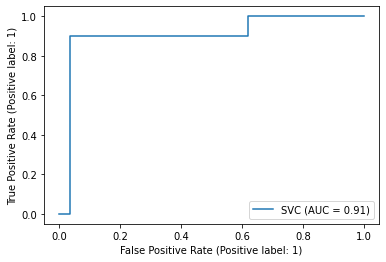

In [49]:
metrics.plot_roc_curve(clf, X_test, y_test)

In [50]:
df_1= (df-df.mean())/df.std()


/var/folders/mb/xqr44lqn1nv2_cy87gj4m2100000gn/T/ipykernel_16086/2723712608.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1= (df-df.mean())/df.std()


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

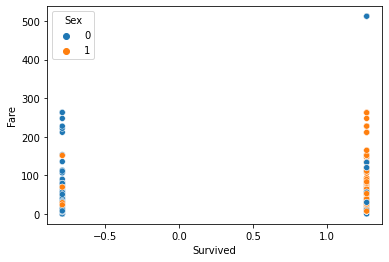

In [51]:
sns.scatterplot(x= df_1['Survived'], y=df['Fare'], hue= df['Sex'] )
# Pclass 	Sex 	SibSp 	Parch 	Fare 	Survived

In [52]:
X_1= df[['Sex','Pclass']]
y_1= df['Survived']

In [53]:


# Loading some example data to play with
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [54]:
m_1= DecisionTreeClassifier(max_depth=4)
m_1.fit(X, y)
#df['Pclass'].max()

DecisionTreeClassifier(max_depth=4)

In [55]:
# Train a classification model
m = DecisionTreeClassifier(max_depth=4)
m.fit(X, y)
#step size in the mesh
h = 0.01

# Plotting decision regions
#For that, we will assign a color to each point in the mesh [x_min, x_max] * [y_min, y_max]
x_min, x_max = X_1[['Sex']].min() - 1, X_1[['Sex']].max() + 1
y_min, y_max = X_1[['Pclass']].min() - 1, X_1[['Pclass']].max() + 1
print(x_min[0], x_max[0])
print(y_min, y_max)


-1 2
Pclass    0
dtype: int64 Pclass    4
dtype: int64


/usr/local/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


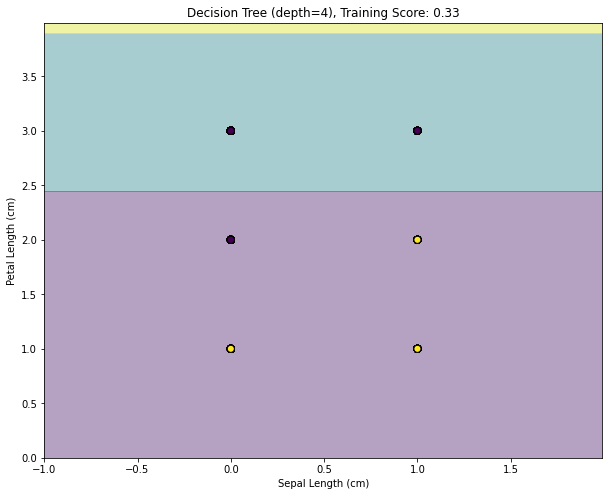

In [56]:


#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                     np.arange(y_min, y_max, h))
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h),
                     np.arange(y_min[0], y_max[0], h))

f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Xgrid = np.c_[xx.ravel(), yy.ravel()]
Z = m_1.predict(Xgrid)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

#plot the training points
ax.scatter(X_1[['Sex']], X_1[['Pclass']], c=y_1, s=50, edgecolor='k')
ax.set_title(f'Decision Tree (depth=4), Training Score: {round(m.score(X_1, y_1), 2)}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

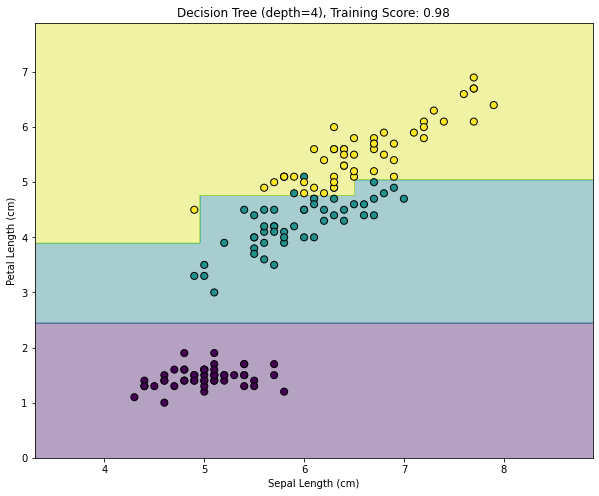

In [57]:
#step size in the mesh
h = 0.01

# Plotting decision regions
#For that, we will assign a color to each point in the mesh [x_min, x_max] * [y_min, y_max]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Xgrid = np.c_[xx.ravel(), yy.ravel()]
Z = m.predict(Xgrid)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

#plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title(f'Decision Tree (depth=4), Training Score: {round(m.score(X, y), 2)}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

'''impute_and_encode = make_pipeline(
    SimpleImputer(strategy='mean'), 
    KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='kmeans')
)

cols_4 = df[['Age']]


impute_and_encode.fit(cols_4)             # apply .fit() of each preprocessor sequentially
t_4 = impute_and_encode.transform(cols_4)   # apply . transform() sequentially
print(t_4.shape)
columns_n= ['young','middle','old']
# create a DataFrame
cols_transformed = pd.DataFrame(t_4, columns=columns_n)
print(cols_transformed.head()) '''

""""trans = ColumnTransformer([
    ('scaler', MinMaxScaler() , ['Fare']),
    ('no NaN', SimpleImputer(strategy='mean') ,['Age']),
    ('ohc', OneHotEncoder(sparse=False, handle_unknown='ignore') , ['Embarked']),
    ('kbins', KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='kmeans') , ['Age'])
   
])""""


""""#trans.fit_transform(df)
t_5 = trans.fit_transform(df)  # result is a numpy array
print(t_5.shape)
print(t_5)
col_trans = pd.DataFrame(t_5, columns=df.columns[:9])
col_trans.head()""""

""""del df['Name']
del df['Cabin']
del df['Embarked']
del df['Ticket']
#del df['Age']
df=df.dropna()"""